In [1]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [24]:
class Lenet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        #CONV => RELU => POOL
        model.add(Conv2D(20, kernel_size=5,padding="same", input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        #Flatten => RELU 계층
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        #소프트맥스분류기
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model

In [3]:
#신경망과 학습에 대한 설정
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT = 0.2
IMG_ROWS, IMG_COLS = 28, 28 #입력 이미지 차원
NB_CLASSES = 10 #출력 갯수 = 숫자의 갯수
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

In [4]:
#데이터 : 섞은 후에 학습 데이터와 테스트 데이터로 분할
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
K.set_image_dim_ordering("th")

In [6]:
#실수 형태로 지정하고 정규화
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [14]:
#60000개 x [1 x 28 x 28]  형태의 입력을 CONVNET에 전달
X_train = X_train[:,np.newaxis, :, :]
X_test = X_test[:,np.newaxis, :, :]
print(X_train.shape[0], 'train sample')
print(X_test.shape[0], 'test sample')

60000 train sample
10000 test sample


In [16]:
Y_test.shape

(10000,)

In [17]:
#클래스 벡터를 이진 클래스 행렬로 변환
Y_train = np_utils.to_categorical(Y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(Y_test, NB_CLASSES)

In [18]:
Y_test.shape

(10000, 10)

In [25]:
#옵티마이저 모델 초기화
cnn = Lenet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)

In [26]:
cnn.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

In [29]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 20, 28, 28)        520       
_________________________________________________________________
activation_4 (Activation)    (None, 20, 28, 28)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 14, 14)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3920)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               1960500   
_________________________________________________________________
activation_5 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
__________

In [30]:
history = cnn.fit(X_train,Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 169s - loss: 0.1969 - acc: 0.9401 - val_loss: 0.0706 - val_acc: 0.9790
Epoch 2/20
48000/48000 [==============================] - 164s - loss: 0.0560 - acc: 0.9828 - val_loss: 0.0542 - val_acc: 0.9833
Epoch 3/20
48000/48000 [==============================] - 168s - loss: 0.0357 - acc: 0.9890 - val_loss: 0.0494 - val_acc: 0.9847
Epoch 4/20
48000/48000 [==============================] - 164s - loss: 0.0248 - acc: 0.9924 - val_loss: 0.0515 - val_acc: 0.9846
Epoch 5/20
48000/48000 [==============================] - 167s - loss: 0.0163 - acc: 0.9952 - val_loss: 0.0497 - val_acc: 0.9862
Epoch 6/20
48000/48000 [==============================] - 163s - loss: 0.0114 - acc: 0.9962 - val_loss: 0.0464 - val_acc: 0.9872
Epoch 7/20
48000/48000 [==============================] - 169s - loss: 0.0095 - acc: 0.9970 - val_loss: 0.0556 - val_acc: 0.9862
Epoch 8/20
48000/48000 [=======================

In [31]:
score = cnn.evaluate(X_test,Y_test, verbose=VERBOSE)

 9984/10000 [============================>.] - ETA: 0s

In [32]:
print("Test score : ", score[0])
print("Test accuracy : ", score[1])

Test score :  0.0560338903872
Test accuracy :  0.9875


In [33]:
#히스토리에 있는 모든 데이터 나열
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

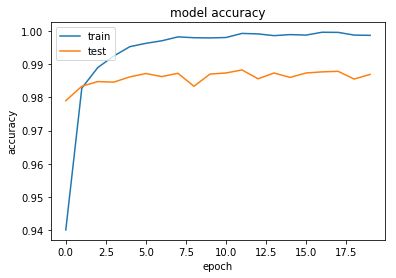

In [35]:
#단순 정확도 히스토리 요약
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
gif = plt.gcf()
plt.show()

In [36]:
gif.savefig('./save/acc.png')